## PREPROCESSING

1. Remove inappropriate games
2. Remove rows that are not games
3. plots before PP
4. Removing NaN values
5. droping the columns
6. categorical to numerical
7. plots
8. Remove outliers
9. scaling
10. PCA
11. plots

---

CLUSTERING


### Imports


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from main_functions import *

### Loading the dataset


In [2]:
df = pd.read_csv("games.csv")
df.head()
df.describe()
df.columns

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x7ff3ed6a3eb0>,
 [Text(1.159698257823127, 0.30838279913445893, 'Unappropriate entries'),
  Text(0.9156110991832516, 0.7756650791755667, 'Utilities'),
  Text(-0.9938456181427858, -0.4714561350734384, 'Appropriate entries')],
 [Text(0.6764906503968241, 0.17988996616176767, '8.3%'),
  Text(0.5341064745235633, 0.4524712961857472, '5.8%'),
  Text(-0.5420976098960649, -0.2571578918582391, '85.9%')])

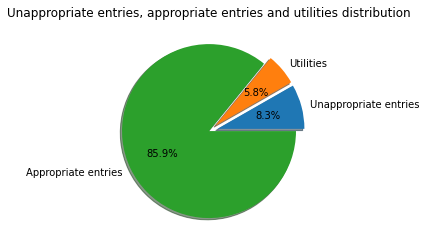

In [3]:
# 85102
# 77626
# 72361

labels = "Unappropriate entries", "Utilities", "Appropriate entries"
sizes = np.array([(85102 - 77626), 77626 - 72361, 77626]) / 85102
explode = (0.1, 0.1, 0)

fig, ax = plt.subplots()
ax.set_title("Unappropriate entries, appropriate entries and utilities distribution")
ax.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True)

In [4]:
# Count occurrences for each word removed
# word_counts = {word: 0 for word in inappropriate_words}

# for word in inappropriate_words:
#     pattern = re.compile(r"\b" + re.escape(word) + r"\b", re.IGNORECASE)
#     word_counts[word] = df.apply(
#         lambda row: sum(
#             pattern.search(str(row[col])) is not None for col in columns_to_check
#         ),
#         axis=1,
#     ).sum()

# # Plotting the results
# plt.figure(figsize=(10, 6))
# bars = plt.bar(word_counts.keys(), word_counts.values(), color="skyblue")

# # Add labels on top of the bars
# for bar in bars:
#     height = bar.get_height()
#     plt.text(
#         bar.get_x() + bar.get_width() / 2,
#         height,
#         f"{int(height)}",
#         ha="center",
#         va="bottom",
#     )

# plt.xlabel("Words Removed")
# plt.ylabel("Number of Rows Containing the Word")
# plt.title("Number of Rows Removed Containing Each Word")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

### Removing the inappropriate games


In [5]:
# Filter out rows that contain any word in the specified columns
df_filtered = df[~df.apply(contains_inappropriate_word, axis=1)]
df = df_filtered
df.head(5)
# Display the filtered dataset
# df_filtered

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
5,1469160,Wartune Reborn,"Feb 26, 2021",50000 - 100000,68,0,0.00,0,Feel tired of auto-fight? Feel tired of boring...,['English'],...,0,0,0,7Road,7Road,"Single-player,Multi-player,MMO,PvP,Online PvP,...","Adventure,Casual,Free to Play,Massively Multip...","Turn-Based Combat,Massively Multiplayer,Multip...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


### Plots


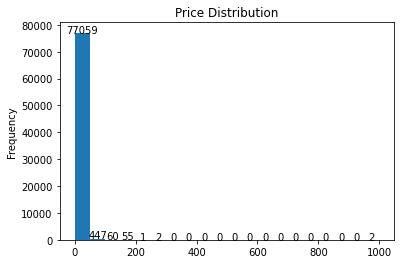

In [6]:
# Create the histogram plot for Price
ax = df["Price"].plot(kind="hist", bins=20, title="Price Distribution")

# Annotate the bars with the respective count values
for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
    )

# Show the plot
plt.show()

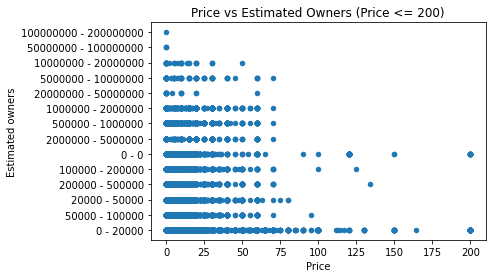

In [7]:
# Filter the data to zoom in on Price <= 200
df_filtered = df[df["Price"] <= 200]

# Replot the scatter plot for Price vs Estimated Owners (Price <= 200)
df_filtered.plot(
    kind="scatter",
    x="Price",
    y="Estimated owners",
    title="Price vs Estimated Owners (Price <= 200)",
)
plt.show()

In [8]:
# Summary statistics for Price
price_summary = df["Price"].describe()
print(price_summary)

count    77626.000000
mean         7.039582
std         11.948244
min          0.000000
25%          0.990000
50%          4.240000
75%          9.990000
max        999.980000
Name: Price, dtype: float64


Price Range
0-50       61370
51-100       447
101-150       60
151-200       55
201-500        3
501+           2
Name: count, dtype: int64


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


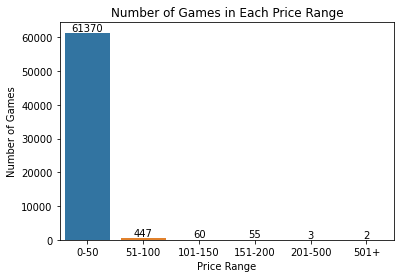

In [9]:
# Create bins for Price ranges
df["Price Range"] = pd.cut(
    df["Price"],
    bins=[0, 50, 100, 150, 200, 500, 1000],
    labels=["0-50", "51-100", "101-150", "151-200", "201-500", "501+"],
)

# Count the number of games in each price range
price_range_counts = df["Price Range"].value_counts().sort_index()
print(price_range_counts)

# Plot the distribution of games across price ranges
ax = sns.barplot(x=price_range_counts.index, y=price_range_counts.values)

# Add annotations to each bar
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="bottom",
    )

plt.title("Number of Games in Each Price Range")
plt.xlabel("Price Range")
plt.ylabel("Number of Games")
plt.show()

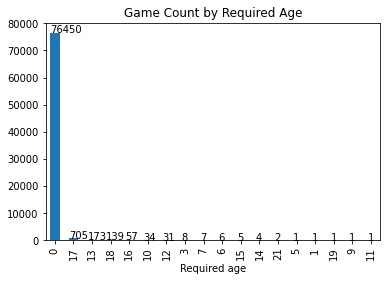

In [10]:
# Create the bar plot for the distribution of games by Required age
ax = (
    df["Required age"]
    .value_counts()
    .plot(kind="bar", title="Game Count by Required Age")
)

# Annotate the bars with the respective count values
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Show the plot
plt.show()

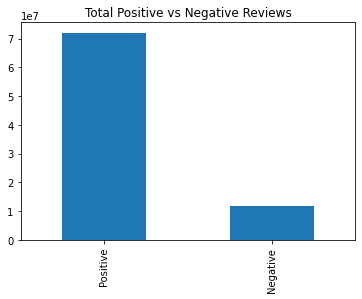

In [11]:
# Bar chart for positive and negative reviews
df[["Positive", "Negative"]].sum().plot(
    kind="bar", title="Total Positive vs Negative Reviews"
)
plt.show()

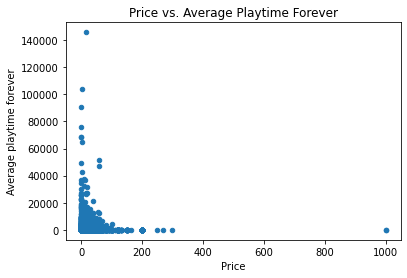

In [12]:
# Scatter plot for Price vs. Average playtime forever
df.plot(
    kind="scatter",
    x="Price",
    y="Average playtime forever",
    title="Price vs. Average Playtime Forever",
)
plt.show()

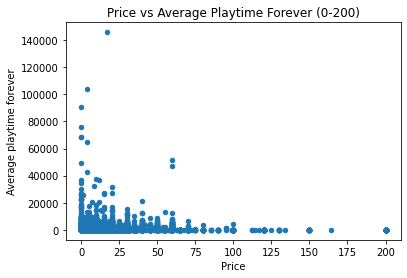

In [13]:
# Filter to zoom in on Price range between 0 and 200
df_filtered = df[df["Price"] <= 200]

# Plot the filtered data
df_filtered.plot(
    kind="scatter",
    x="Price",
    y="Average playtime forever",
    title="Price vs Average Playtime Forever (0-200)",
)
plt.show()

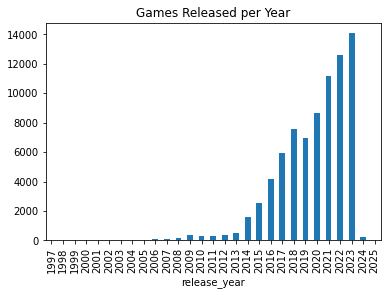

In [14]:
# Plot the number of games released per year
df["release_year"] = df["Release date"].str.extract(r"(\d{4})").astype(int)
df["release_year"].value_counts().sort_index().plot(
    kind="bar", title="Games Released per Year"
)
plt.show()

In [15]:
# Calculate the number of missing values in each column
missing_values = df.isnull().sum()

# Display the missing values count
print(missing_values)

AppID                             0
Name                              5
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
DLC count                         0
About the game                 3548
Supported languages               0
Full audio languages              0
Reviews                       68457
Header image                      0
Website                       40908
Support url                   39155
Support email                 12508
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Metacritic url                73960
User score                        0
Positive                          0
Negative                          0
Score rank                    77623
Achievements                      0
Recommendations                   0
Notes                       

In [16]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt


# # Create a heatmap to visualize missing values
# plt.figure(figsize=(10, 6))
# sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
# plt.title('Missing Values Heatmap')
# plt.show()

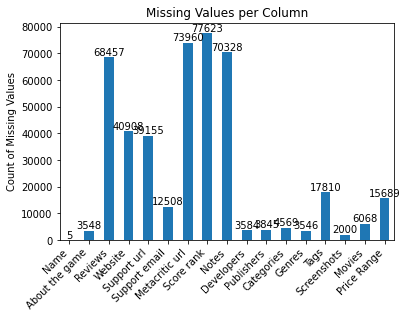

In [17]:
# Calculate the number of missing values in each column
missing_values = df.isnull().sum()

# Filter columns with missing values
missing_values = missing_values[missing_values > 0]

# Plot the missing values
ax = missing_values.plot(
    kind="bar", title="Missing Values per Column", ylabel="Count of Missing Values"
)
plt.xticks(rotation=45, ha="right")

# Annotate each bar with the number of missing values
for i, v in enumerate(missing_values):
    ax.text(i, v + 0.5, str(v), ha="center", va="bottom")

plt.show()

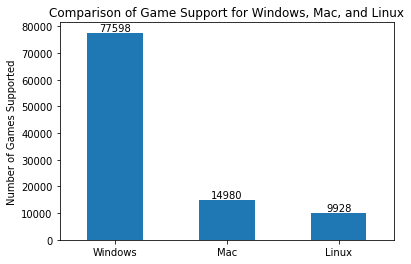

In [18]:
# Summarize the number of games that support each platform (True values indicate support)
platform_support = df[["Windows", "Mac", "Linux"]].apply(
    lambda x: x.value_counts().get(True, 0)
)

# Create a bar plot with the number annotated on top of each bar
ax = platform_support.plot(
    kind="bar",
    title="Comparison of Game Support for Windows, Mac, and Linux",
    ylabel="Number of Games Supported",
)
plt.xticks(rotation=0)

# Annotate the bars with the values
for i, v in enumerate(platform_support):
    ax.text(i, v + 0.1, str(v), ha="center", va="bottom")

plt.show()

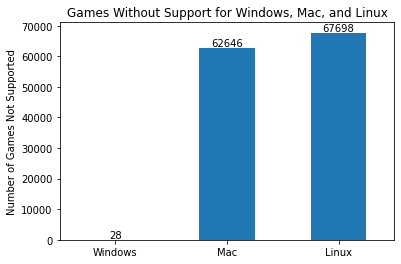

In [19]:
# Count the number of `False` values in each platform column (Windows, Mac, Linux)
platform_no_support = df[["Windows", "Mac", "Linux"]].apply(
    lambda x: (x == False).sum()
)

# Create a bar plot with the number of games that do not support each platform
ax = platform_no_support.plot(
    kind="bar",
    title="Games Without Support for Windows, Mac, and Linux",
    ylabel="Number of Games Not Supported",
)
plt.xticks(rotation=0)

# Annotate the bars with the count of `False` values
for i, v in enumerate(platform_no_support):
    ax.text(i, v + 0.1, str(v), ha="center", va="bottom")

plt.show()

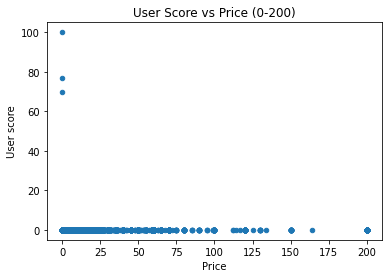

In [20]:
# Zoom in on Price range between 0 and 200
df_price_filtered = df[df["Price"] <= 200]
df_price_filtered.plot(
    kind="scatter", x="Price", y="User score", title="User Score vs Price (0-200)"
)
plt.show()

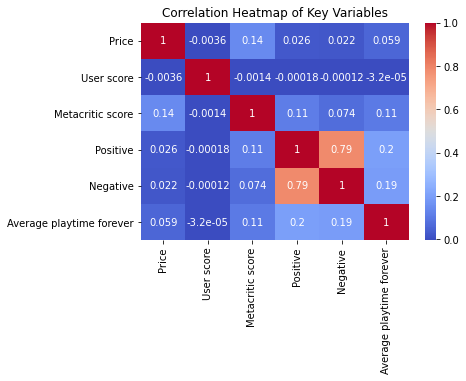

In [21]:
# Correlation heatmap
corr = df[
    [
        "Price",
        "User score",
        "Metacritic score",
        # "Estimated owners",
        # "Reviews",
        "Positive",
        "Negative",
        "Average playtime forever",
    ]
].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Key Variables")
plt.show()

In [22]:
# import seaborn as sns

# # Pair plot for key variables related to clustering
# sns.pairplot(df[['User score', 'Price', 'Estimated owners', 'Average playtime forever']])
# plt.title('Pair Plot of Key Features')
# plt.show()

In [23]:
# Assuming 'Supported languages' is a column with comma-separated language values
df["Supported languages"] = df["Supported languages"].fillna("")

# Split the languages into separate rows (explode)
df_languages = df.assign(
    Supported_languages=df["Supported languages"].str.split(",")
).explode("Supported_languages")

# Strip any leading/trailing spaces
df_languages["Supported_languages"] = df_languages["Supported_languages"].str.strip()

# Get the count of each language
language_counts = df_languages["Supported_languages"].value_counts()
print(language_counts)

Supported_languages
['English']          40268
['English'           29085
'German'             15598
'French'             15451
'Spanish - Spain'    12775
                     ...  
['Portuguese'            1
['Slovak']               1
['Indonesian']           1
'Maori']                 1
['Romanian'              1
Name: count, Length: 260, dtype: int64


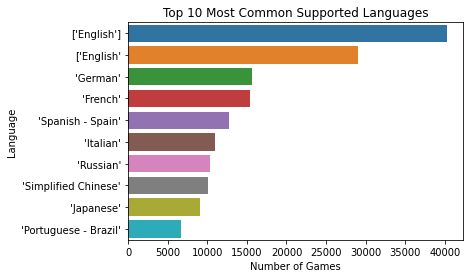

In [24]:
# Plot the top 10 most common languages
top_languages = language_counts.head(10)
sns.barplot(x=top_languages.values, y=top_languages.index)
plt.title("Top 10 Most Common Supported Languages")
plt.xlabel("Number of Games")
plt.ylabel("Language")
plt.show()

Genres
Indie                    52210
Action                   31900
Casual                   30355
Adventure                28202
Strategy                 14806
Simulation               14224
RPG                      12421
Early Access              9859
Free to Play              6179
Sports                    3646
                          3546
Racing                    2998
Massively Multiplayer     2055
Utilities                  828
Design & Illustration      488
Violent                    443
Animation & Modeling       397
Education                  391
Video Production           282
Gore                       260
Game Development           235
Software Training          203
Audio Production           200
Photo Editing              136
Web Publishing             107
Accounting                  21
Movie                        2
Documentary                  1
Episodic                     1
Short                        1
Tutorial                     1
360 Video                    1
N

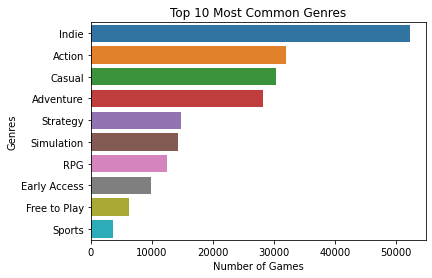

In [25]:
# Assuming 'Genres' is a column with comma-separated values
df["Genres"] = df["Genres"].fillna("")

# Split the genres into separate rows (explode)
df_genres = df.assign(Genres=df["Genres"].str.split(",")).explode("Genres")

# Strip any leading/trailing spaces
df_genres["Genres"] = df_genres["Genres"].str.strip()

# Get the count of each genre
genre_counts = df_genres["Genres"].value_counts()

print(genre_counts)

# Plot the top 10 most common genres
top_genres = genre_counts.head(10)
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 10 Most Common Genres")
plt.xlabel("Number of Games")
plt.ylabel("Genres")
plt.show()

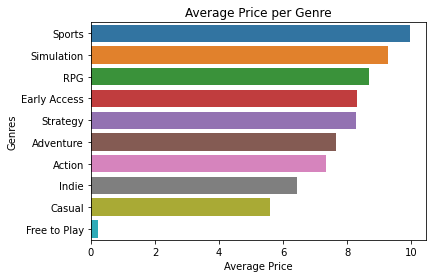

In [26]:
# Group by Genres and calculate the average price for each genre
# avg_price_per_genre = (
#     df_genres.groupby("Genres")["Price"].mean(.so)rt_values(ascending=False)
# )

genres_to_plot = [
    "Indie",
    "Action",
    "Casual",
    "Adventure",
    "Strategy",
    "Simulation",
    "RPG",
    "Early Access",
    "Free to Play",
    "Sports",
]  # specify your desired genres

# Group by Genres and calculate the average price for each genre
avg_price_per_genre = (
    df_genres.groupby("Genres")["Price"].mean().sort_values(ascending=False)
)

# Filter for the specified genres
filtered_avg_price = avg_price_per_genre[avg_price_per_genre.index.isin(genres_to_plot)]


# Plot the top 10 genres with the highest average price
sns.barplot(x=filtered_avg_price.values, y=filtered_avg_price.index)
# sns.barplot(x=avg_price_per_genre.head(20).values, y=avg_price_per_genre.head(20).index)
plt.title("Average Price per Genre")
plt.xlabel("Average Price")
plt.ylabel("Genres")
plt.show()

/var/folders/sk/wpmxgnqn6vg452j83679lgbh0000gp/T/ipykernel_44039/98120652.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_genres.groupby(["Price Range", "Genres"]).size().unstack().fillna(0)


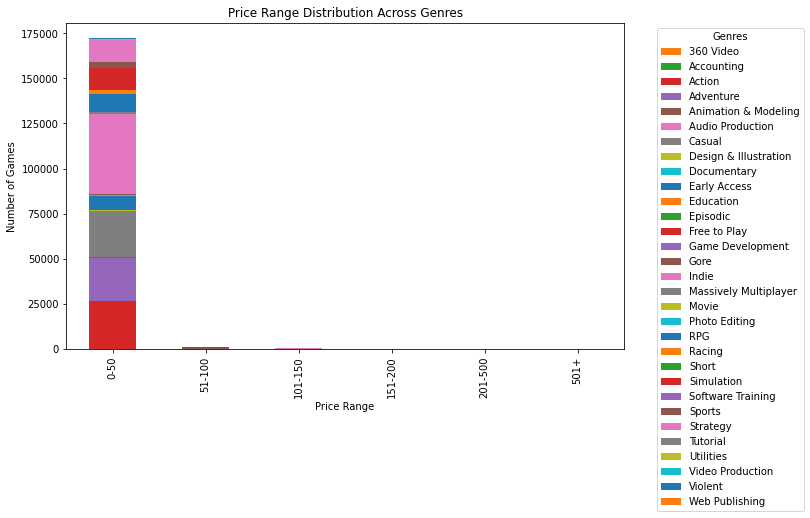

In [27]:
# Create bins for Price ranges
df_genres["Price Range"] = pd.cut(
    df_genres["Price"],
    bins=[0, 50, 100, 150, 200, 500, 1000],
    labels=["0-50", "51-100", "101-150", "151-200", "201-500", "501+"],
)

# Count how many games fall within each Price Range for each Genre
price_range_genre_count = (
    df_genres.groupby(["Price Range", "Genres"]).size().unstack().fillna(0)
)

# Plot the count of games for each Genre across Price Ranges
price_range_genre_count.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Price Range Distribution Across Genres")
plt.xlabel("Price Range")
plt.ylabel("Number of Games")
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

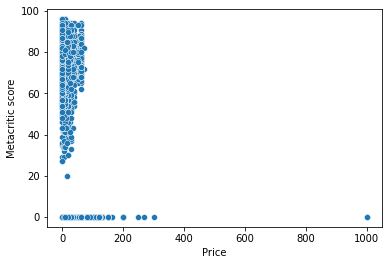

In [28]:
# Pair plot to explore relationships between Price and other variables
sns.scatterplot(data=df, x="Price", y="Metacritic score")
# plt.title("Pair Plot of Price and Related Variables")
plt.show()

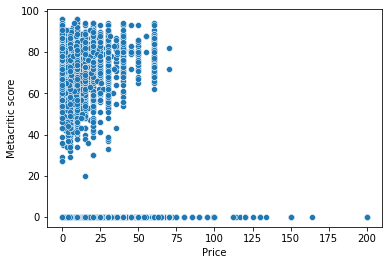

In [29]:
# Pair plot to explore relationships between Price and other variables
sns.scatterplot(data=df_price_filtered, x="Price", y="Metacritic score")
# plt.title("Pair Plot of Price and Related Variables")
plt.show()

In [30]:
categories = []
for item in df["Genres"].tolist():
    categories.extend(item.split(","))
set(categories)
df.loc[df["Genres"].str.contains("Utilities")]

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies,Price Range,release_year
31,1727670,Home Office Tasker,"Sep 8, 2021",0 - 20000,0,0,0.99,0,You no longer need to go to special applicatio...,"['English', 'Russian', 'German', 'Spanish - Sp...",...,0,lonch.me,lonch.me,NaN,Utilities,"Utilities,Time Management,Time Manipulation,So...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0-50,2021
260,304970,SolidFace Parametric CAD Modeler 2D/3D,"Dec 22, 2014",0 - 20000,0,0,0.00,0,Part module SolidFace Sketch automatically cre...,"['English', 'Portuguese - Brazil']",...,0,"SolidFace Technology Inc.,Oscar L.",SolidFace Technology Inc.,Single-player,"Animation & Modeling,Design & Illustration,Uti...","Design & Illustration,Animation & Modeling,Uti...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,NaN,2014
345,388080,Borderless Gaming,"Jul 23, 2015",200000 - 500000,570,0,3.99,1,Borderless Gaming forces borderless-fullscreen...,"['English', 'German', 'Russian', 'French', 'Si...",...,2526,"AndrewMD5,Codeusa",NaN,"Single-player,Steam Achievements,Steam Trading...",Utilities,"Utilities,Software,Indie,Anime",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0-50,2015
359,417540,Gamefuel Driver Control,"Dec 10, 2015",20000 - 50000,0,0,29.99,0,The problem: You may have hardware or devices ...,['English'],...,0,Auslogics Software,Console Classics,NaN,Utilities,Utilities,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0-50,2015
450,620050,Start10,"May 11, 2017",0 - 20000,0,0,4.99,0,Customize your Start menu for easy access to U...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,Stardock,Stardock,NaN,Utilities,"Utilities,Software",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0-50,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84518,2576020,Movavi Video Suite 2024 Steam Edition,"Dec 18, 2023",0 - 20000,2,0,89.99,22,Make your every video project a breeze: be it ...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,Movavi,Movavi,NaN,"Animation & Modeling,Audio Production,Design &...","Utilities,Video Production,Photo Editing,Anima...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,51-100,2023
84550,2717280,Sniper Simulator,"Dec 19, 2023",0 - 20000,1,0,4.99,0,Sniper Simulator is a sniping teaching app. Th...,"['English', 'Simplified Chinese']",...,0,SUN JINZHE,SUN JINZHE,NaN,"Education,Utilities","Education,Utilities,Sniper",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0-50,2023
84638,2641350,YoloX - Crosshair Overlay,"Dec 21, 2023",0 - 20000,5,0,5.99,0,Use YoloX to change your game crosshair. Inclu...,"['English', 'Simplified Chinese']",...,0,Dragonrise Games,Dragonrise Games,"Steam Workshop,Includes level editor","Action,Animation & Modeling,Design & Illustrat...","Utilities,Software Training,Action,Design & Il...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0-50,2023
84674,2603950,Timeline 存档守护者 -Manage your game save,"Dec 28, 2023",0 - 20000,0,0,3.99,0,Timeline is a game utility tool designed prima...,"['Simplified Chinese', 'English']",...,0,a little dream,a little dream,NaN,"Indie,Education,Photo Editing,Software Trainin...","Indie,Utilities,Photo Editing,Education,Softwa...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0-50,2023


### Removing NaN values


In [31]:
df = handle_missing_values(df)
df.isnull().values.any()
df.head(5)
print(df.shape)

(73931, 41)


### Removing rows that are not games


In [32]:
# Remove any entries that are not games (like Utilities)
df = remove_non_games(df)
df.head(5)
print(df.shape)

(72360, 41)


In [33]:
# storing id in a separate dataframe
id_df = df[["AppID", "Price"]]
id_df.head(5)
print(id_df.shape)

(72360, 2)


### Droping the columns


In [34]:
df_before_dropping = df.copy()
columns_to_drop = [
    "AppID",
    "Full audio languages",
    "Header image",
    "Website",
    "Support url",
    "Support email",
    "Metacritic url",
    "Score rank",
    "Achievements",
    "Screenshots",
    "Movies",
]
df = df.drop(columns=columns_to_drop, errors="ignore")
print(df.shape, id_df.shape)

(72360, 30) (72360, 2)


In [35]:
df.head(5)

,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Reviews,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Price Range,release_year
0,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],,...,0,0,0,Perpetual FX Creative,Selfpublished,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",0-50,2008
1,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",,...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",0-50,2017
2,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",,...,0,0,0,Campião Games,Selfpublished,Single-player,"Action,Adventure,Indie,Strategy",,0-50,2021
3,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",,...,0,0,0,Odd Critter Games,Selfpublished,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",0-50,2020
5,Wartune Reborn,"Feb 26, 2021",50000 - 100000,68,0,0.00,0,Feel tired of auto-fight? Feel tired of boring...,['English'],,...,0,0,0,7Road,Selfpublished,"Single-player,Multi-player,MMO,PvP,Online PvP,...","Adventure,Casual,Free to Play,Massively Multip...","Turn-Based Combat,Massively Multiplayer,Multip...",NaN,2021


### Categorical to numerical


In [36]:
df.dtypes

# estimated owners - convert
# About the game - drop
# Supported languages - drop
# reviews - drop
# windoes - drop
# linux - drop
# mac - drop
# notes - drop
# developers - drop
# publishers - drop

Name                            object
Release date                    object
Estimated owners                object
Peak CCU                         int64
Required age                     int64
Price                          float64
DLC count                        int64
About the game                  object
Supported languages             object
Reviews                         object
Windows                           bool
Mac                               bool
Linux                             bool
Metacritic score                 int64
User score                       int64
Positive                         int64
Negative                         int64
Recommendations                  int64
Notes                           object
Average playtime forever         int64
Average playtime two weeks       int64
Median playtime forever          int64
Median playtime two weeks        int64
Developers                      object
Publishers                      object
Categories               

In [37]:
df = add_release_season_column(df)
df = convert_estimated_owners_to_midpoints(df)
df = add_review_columns(df)
df = add_online_offline_column(df)
df = add_player_type_numeric_column(df)

In [38]:
print(df.shape, id_df.shape)

(72360, 37) (72360, 2)


In [39]:
# test = df_filtered.select_dtypes(exclude=['object'])
# test.dtypes

In [40]:
# df_filtered.isnull().values.any()
# lista = df_filtered.columns[df_filtered.isna().any()].tolist()
# lista
# df_filtered[lista].to_csv("poop.csv")

### Plots about new columns


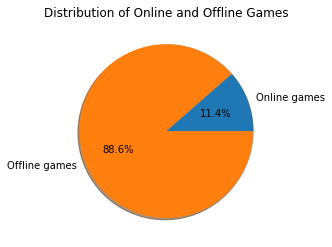

In [41]:
offline_games = df[df["online_offline"] == 0].shape[0]
online_games = df[df["online_offline"] == 1].shape[0]
total_games = df.shape[0]

labels = (
    "Online games",
    "Offline games",
)
sizes = np.array([(online_games), (offline_games)]) / total_games
explode = (0, 0)

fig, ax = plt.subplots()
ax.set_title("Distribution of Online and Offline Games")
ax.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True)
plt.show()

### Removing the outliers


In [42]:
# only keep columns with numerical data
n_neighbors = 20
df_numeric = df[
    [
        "Peak CCU",
        "Required age",
        "Price",
        "DLC count",
        "Windows",
        "Mac",
        "Linux",
        "Metacritic score",
        "User score",
        "Positive",
        "Negative",
        "Recommendations",
        "Average playtime forever",
        "Average playtime two weeks",
        "Median playtime forever",
        "Median playtime two weeks",
    ]
]

# broad outliers detection
clf = LocalOutlierFactor(n_neighbors=n_neighbors)
df_filtered = clf.fit_predict(df_numeric)
df = df[df_filtered != -1]
id_df = id_df[df_filtered != -1]

all_genres = get_set_of_all_genres(df)


def func(row):
    # if type(row["Genres"]) is not str:
    #     print(f'{row["Genres"]}, {row["Name"]}, {type(row["Genres"])}')
    return set(str(row["Genres"]).split(",")) == all_genres


# specific outliers detection
# remove any game that happens to have all the possible genres
df_filtered = df.apply(func, axis=1)
df = df[~df_filtered]
id_df = id_df[~df_filtered]
# df = remove_outliers(df)
print(df.shape, id_df.shape)

(64454, 37) (64454, 2)


### Scaling


In [43]:
# code for scaling

df = df.drop(columns=["release_season_num"])

df = scaling(df.select_dtypes(include=["number"]), "minmax")
id_df["Price"] = scaling(id_df[["Price"]], "minmax")
print(df.shape, id_df.shape)

(64454, 19) (64454, 2)


In [44]:
df

,Peak CCU,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,release_year,estimated_owners_midpoint,total_reviews,positive_ratio,online_offline,player_type_numeric
0,0.000000,0.0,0.099955,0.0,0.0,0.0,0.000014,0.000193,0.0,0.0,0.0,0.0,0.0,0.392857,0.000286,0.000037,0.352941,0.0,1.000000
1,0.000000,0.0,0.004950,0.0,0.0,0.0,0.000120,0.000088,0.0,0.0,0.0,0.0,0.0,0.714286,0.000286,0.000128,0.913793,0.0,0.333333
2,0.000000,0.0,0.024951,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.857143,0.000286,0.000000,0.000000,0.0,0.333333
3,0.000000,0.0,0.029951,0.0,0.0,0.0,0.000007,0.000000,0.0,0.0,0.0,0.0,0.0,0.821429,0.000286,0.000007,1.000000,0.0,0.333333
8,0.000015,0.0,0.074954,0.0,0.0,0.0,0.000172,0.000105,0.0,0.0,0.0,0.0,0.0,0.821429,0.000286,0.000180,0.926829,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85098,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.964286,0.000000,0.000000,0.000000,0.0,0.333333
85099,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.964286,0.000000,0.000000,0.000000,0.0,0.333333
85100,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.964286,0.000000,0.000000,0.000000,0.0,0.333333
85101,0.000000,0.0,0.019951,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.964286,0.000000,0.000000,0.000000,0.0,0.333333


In [45]:
id_df

,AppID,Price
0,20200,0.099955
1,655370,0.004950
2,1732930,0.024951
3,1355720,0.029951
8,1178150,0.074954
...,...,...
85098,2669080,0.000000
85099,2736910,0.000000
85100,2743220,0.000000
85101,2293130,0.019951


### Correlation plot


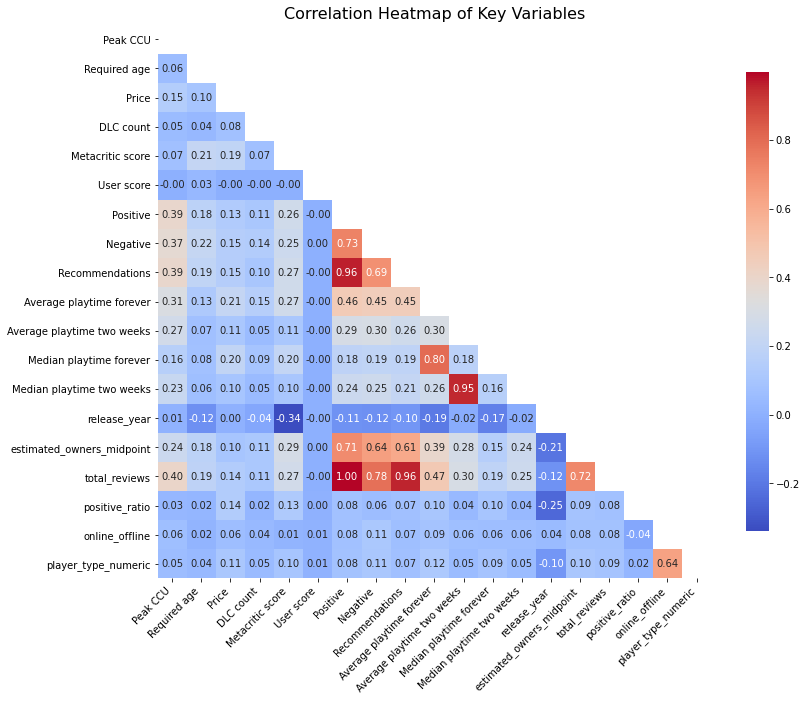

In [46]:
# Correlation heatmap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame
# df = pd.DataFrame(...) # Assume df is your DataFrame

# Calculate the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))  # Adjust the size as needed

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    mask=mask,
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": 0.8},
)

# Rotate x and y labels
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

# Set the title
plt.title("Correlation Heatmap of Key Variables", fontsize=16)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

### PCA


Selected features: Index(['Required age', 'Price', 'DLC count', 'Metacritic score', 'User score',
       'Positive', 'Negative', 'Recommendations', 'Average playtime forever',
       'Average playtime two weeks', 'Median playtime forever',
       'Median playtime two weeks', 'release_year',
       'estimated_owners_midpoint', 'total_reviews', 'positive_ratio',
       'online_offline', 'player_type_numeric'],
      dtype='object')
Explained variance ratio: [0.39385245 0.3804849  0.0929289  0.0716895 ]
Cumulative explained variance ratio: [0.39385245 0.77433735 0.86726624 0.93895574]
[[-0.28154535  0.07296999  0.36588401  0.44099334]
 [ 0.34669801  0.0276093  -0.05956655 -0.01195914]
 [-0.42601532 -0.46793497  0.00689633 -0.01496802]
 ...
 [-0.43348553 -0.47372457 -0.02188462 -0.00987993]
 [-0.43329116 -0.47333366 -0.02107512 -0.01018377]
 [-0.43299888 -0.47274583 -0.01985783 -0.01064067]]


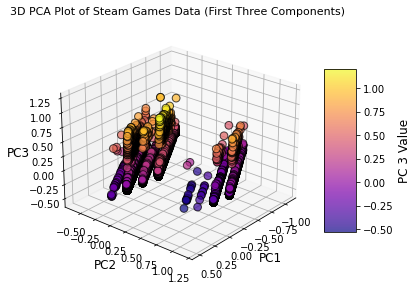

In [47]:
# Code for
# df.isnull().values.any()
# df.columns[df.isna().any()].tolist()
pca, loadings = implement_PCA(df, df[df.columns[1:]].columns)
print(pca)
plot_PCA(pca)

In [48]:
print(pca.shape, id_df.shape)

(64454, 4) (64454, 2)


In [49]:
# pca_df = pd.merge(pd.DataFrame(pca, columns=["PC1", "PC2", "PC3", "PC4"]), app_id_df, left_index=True, right_index=True)
# pca_df.to_numpy()

In [50]:
print(loadings)

     Required age     Price  DLC count  Metacritic score  User score  \
PC1      0.003460  0.009742  -0.000047          0.051348   -0.000047   
PC2      0.011994  0.019593   0.000852          0.069233    0.000113   
PC3      0.132086  0.040574   0.002109          0.792260    0.000007   
PC4     -0.085030 -0.015229  -0.001023         -0.519879   -0.000042   

     Positive  Negative  Recommendations  Average playtime forever  \
PC1  0.001072 -0.000321         0.001108                  0.003245   
PC2  0.004996  0.005573         0.004634                  0.012650   
PC3  0.017974  0.016467         0.018486                  0.039687   
PC4 -0.013351 -0.012435        -0.013821                 -0.021230   

     Average playtime two weeks  Median playtime forever  \
PC1                    0.000027                 0.003688   
PC2                    0.001957                 0.009670   
PC3                    0.003877                 0.029008   
PC4                   -0.003848                -

In [51]:
print(loadings.abs().idxmax(axis=1))

PC1         positive_ratio
PC2         online_offline
PC3       Metacritic score
PC4    player_type_numeric
dtype: object


### Clustering


In [52]:
from sklearn.cluster import KMeans, DBSCAN

# kmeans = KMeans(n_clusters=2)
# kmeans.fit(pca)
DBSCAN = DBSCAN(eps=0.32, min_samples=160)
db_labels = DBSCAN.fit_predict(pca)

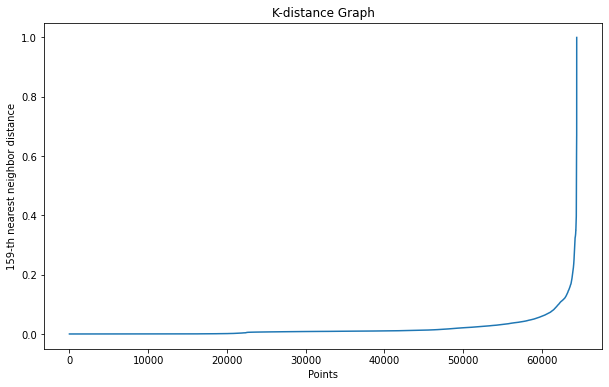

In [53]:
from sklearn.neighbors import NearestNeighbors


def plot_k_distance_graph(X, k):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)
    distances, _ = neigh.kneighbors(X)
    distances = np.sort(distances[:, k - 1])
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel("Points")
    plt.ylabel(f"{k}-th nearest neighbor distance")
    plt.title("K-distance Graph")
    plt.show()
    return distances


# Plot k-distance graph
distances = plot_k_distance_graph(pca, k=159)

In [54]:
from kneed import KneeLocator

kneedle = KneeLocator(
    range(len(distances)), distances, curve="convex", direction="increasing"
)
optimal_eps = distances[kneedle.elbow]

print(f"Optimal value for epsilon: {optimal_eps}")

Optimal value for epsilon: 0.326715205785821


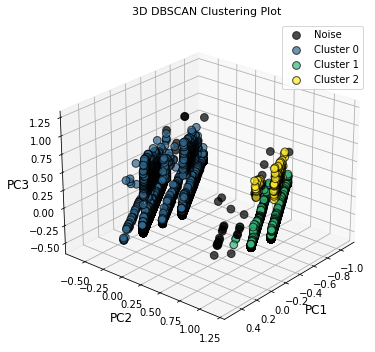

In [55]:
from mpl_toolkits.mplot3d import Axes3D


def plot_dbscan_3D(components, labels):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection="3d")

    # Scatter plot for the DBSCAN clustering
    unique_labels = np.unique(labels)
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

    for k, color in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise (outliers)
            color = [0, 0, 0, 1]

        class_member_mask = labels == k

        # Plot the clustered points
        xyz = components[class_member_mask]
        ax.scatter(
            xyz[:, 0],
            xyz[:, 1],
            xyz[:, 2],
            c=[color],
            s=60,
            alpha=0.7,
            edgecolors="k",
            label=f"Cluster {k}" if k != -1 else "Noise",
        )

    # Set labels and title
    ax.set_xlabel("PC1", fontsize=12)
    ax.set_ylabel("PC2", fontsize=12)
    ax.set_zlabel("PC3", fontsize=12)
    ax.set_title("3D DBSCAN Clustering Plot", fontsize=11)

    # Adjust viewing angle for better perspective
    ax.view_init(elev=25, azim=40)  # Change angles as needed

    plt.gcf().subplots_adjust(left=0.45)
    ax.legend(loc="best")

    # Show the plot
    plt.show()


plot_dbscan_3D(pca, db_labels)

In [56]:
print(loadings)

     Required age     Price  DLC count  Metacritic score  User score  \
PC1      0.003460  0.009742  -0.000047          0.051348   -0.000047   
PC2      0.011994  0.019593   0.000852          0.069233    0.000113   
PC3      0.132086  0.040574   0.002109          0.792260    0.000007   
PC4     -0.085030 -0.015229  -0.001023         -0.519879   -0.000042   

     Positive  Negative  Recommendations  Average playtime forever  \
PC1  0.001072 -0.000321         0.001108                  0.003245   
PC2  0.004996  0.005573         0.004634                  0.012650   
PC3  0.017974  0.016467         0.018486                  0.039687   
PC4 -0.013351 -0.012435        -0.013821                 -0.021230   

     Average playtime two weeks  Median playtime forever  \
PC1                    0.000027                 0.003688   
PC2                    0.001957                 0.009670   
PC3                    0.003877                 0.029008   
PC4                   -0.003848                -

In [57]:
df["Cluster"] = db_labels  # Add the cluster labels to the original DataFrame
cluster_means = df.groupby(
    "Cluster"
).mean()  # Calculate the mean of each feature for each cluster

print(cluster_means)

         Peak CCU  Required age     Price  DLC count  Metacritic score  \
Cluster                                                                  
-1       0.021146      0.043758  0.030503   0.003089          0.431306   
 0       0.000506      0.010783  0.033697   0.000442          0.038738   
 1       0.002730      0.010889  0.038869   0.000856          0.000044   
 2       0.017513      0.087165  0.102371   0.005570          0.772241   

         User score  Positive  Negative  Recommendations  \
Cluster                                                    
-1         0.000000  0.023913  0.037541         0.022734   
 0         0.000000  0.001093  0.001151         0.001075   
 1         0.000145  0.002645  0.003909         0.002335   
 2         0.000000  0.033248  0.037282         0.032407   

         Average playtime forever  Average playtime two weeks  \
Cluster                                                         
-1                       0.052567                    0.008930   

In [58]:
df

,Peak CCU,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,release_year,estimated_owners_midpoint,total_reviews,positive_ratio,online_offline,player_type_numeric,Cluster
0,0.000000,0.0,0.099955,0.0,0.0,0.0,0.000014,0.000193,0.0,0.0,0.0,0.0,0.0,0.392857,0.000286,0.000037,0.352941,0.0,1.000000,0
1,0.000000,0.0,0.004950,0.0,0.0,0.0,0.000120,0.000088,0.0,0.0,0.0,0.0,0.0,0.714286,0.000286,0.000128,0.913793,0.0,0.333333,0
2,0.000000,0.0,0.024951,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.857143,0.000286,0.000000,0.000000,0.0,0.333333,0
3,0.000000,0.0,0.029951,0.0,0.0,0.0,0.000007,0.000000,0.0,0.0,0.0,0.0,0.0,0.821429,0.000286,0.000007,1.000000,0.0,0.333333,0
8,0.000015,0.0,0.074954,0.0,0.0,0.0,0.000172,0.000105,0.0,0.0,0.0,0.0,0.0,0.821429,0.000286,0.000180,0.926829,0.0,0.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85098,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.964286,0.000000,0.000000,0.000000,0.0,0.333333,0
85099,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.964286,0.000000,0.000000,0.000000,0.0,0.333333,0
85100,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.964286,0.000000,0.000000,0.000000,0.0,0.333333,0
85101,0.000000,0.0,0.019951,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.964286,0.000000,0.000000,0.000000,0.0,0.333333,0


In [59]:
print(pca.shape, id_df.shape, df.shape)

(64454, 4) (64454, 2) (64454, 20)


In [60]:
id_df

,AppID,Price
0,20200,0.099955
1,655370,0.004950
2,1732930,0.024951
3,1355720,0.029951
8,1178150,0.074954
...,...,...
85098,2669080,0.000000
85099,2736910,0.000000
85100,2743220,0.000000
85101,2293130,0.019951


In [61]:
df

,Peak CCU,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,release_year,estimated_owners_midpoint,total_reviews,positive_ratio,online_offline,player_type_numeric,Cluster
0,0.000000,0.0,0.099955,0.0,0.0,0.0,0.000014,0.000193,0.0,0.0,0.0,0.0,0.0,0.392857,0.000286,0.000037,0.352941,0.0,1.000000,0
1,0.000000,0.0,0.004950,0.0,0.0,0.0,0.000120,0.000088,0.0,0.0,0.0,0.0,0.0,0.714286,0.000286,0.000128,0.913793,0.0,0.333333,0
2,0.000000,0.0,0.024951,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.857143,0.000286,0.000000,0.000000,0.0,0.333333,0
3,0.000000,0.0,0.029951,0.0,0.0,0.0,0.000007,0.000000,0.0,0.0,0.0,0.0,0.0,0.821429,0.000286,0.000007,1.000000,0.0,0.333333,0
8,0.000015,0.0,0.074954,0.0,0.0,0.0,0.000172,0.000105,0.0,0.0,0.0,0.0,0.0,0.821429,0.000286,0.000180,0.926829,0.0,0.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85098,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.964286,0.000000,0.000000,0.000000,0.0,0.333333,0
85099,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.964286,0.000000,0.000000,0.000000,0.0,0.333333,0
85100,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.964286,0.000000,0.000000,0.000000,0.0,0.333333,0
85101,0.000000,0.0,0.019951,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.964286,0.000000,0.000000,0.000000,0.0,0.333333,0


In [62]:
# final_df = pd.merge(df, id_df, left_index=True, right_index=True)
# final_df = pd.concat([df, id_df], axis=1)
# final_df
df["AppID"] = id_df["AppID"].to_numpy()
df

,Peak CCU,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Recommendations,Average playtime forever,...,Median playtime forever,Median playtime two weeks,release_year,estimated_owners_midpoint,total_reviews,positive_ratio,online_offline,player_type_numeric,Cluster,AppID
0,0.000000,0.0,0.099955,0.0,0.0,0.0,0.000014,0.000193,0.0,0.0,...,0.0,0.0,0.392857,0.000286,0.000037,0.352941,0.0,1.000000,0,20200
1,0.000000,0.0,0.004950,0.0,0.0,0.0,0.000120,0.000088,0.0,0.0,...,0.0,0.0,0.714286,0.000286,0.000128,0.913793,0.0,0.333333,0,655370
2,0.000000,0.0,0.024951,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.857143,0.000286,0.000000,0.000000,0.0,0.333333,0,1732930
3,0.000000,0.0,0.029951,0.0,0.0,0.0,0.000007,0.000000,0.0,0.0,...,0.0,0.0,0.821429,0.000286,0.000007,1.000000,0.0,0.333333,0,1355720
8,0.000015,0.0,0.074954,0.0,0.0,0.0,0.000172,0.000105,0.0,0.0,...,0.0,0.0,0.821429,0.000286,0.000180,0.926829,0.0,0.333333,0,1178150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85098,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.964286,0.000000,0.000000,0.000000,0.0,0.333333,0,2669080
85099,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.964286,0.000000,0.000000,0.000000,0.0,0.333333,0,2736910
85100,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.964286,0.000000,0.000000,0.000000,0.0,0.333333,0,2743220
85101,0.000000,0.0,0.019951,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.964286,0.000000,0.000000,0.000000,0.0,0.333333,0,2293130


In [63]:
cluster_2_df = df[df["Cluster"] == 2]
cluster_2_df

,Peak CCU,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Recommendations,Average playtime forever,...,Median playtime forever,Median playtime two weeks,release_year,estimated_owners_midpoint,total_reviews,positive_ratio,online_offline,player_type_numeric,Cluster,AppID
119,0.000650,0.0,0.081204,0.025074,0.906250,0.0,0.004778,0.001944,0.005376,0.013017,...,0.023503,0.000000,0.857143,0.002143,0.004879,0.949977,1.0,1.0,2,1345820
174,0.000059,0.0,0.064953,0.000000,0.791667,0.0,0.000752,0.000578,0.000854,0.015605,...,0.017146,0.000000,0.785714,0.000286,0.000803,0.909589,1.0,1.0,2,761910
208,0.000251,0.0,0.149957,0.013274,0.750000,0.0,0.002040,0.002207,0.001980,0.031286,...,0.034376,0.000000,0.821429,0.001000,0.002256,0.877193,1.0,1.0,2,1089830
416,0.000030,0.0,0.099955,0.000000,0.708333,0.0,0.001487,0.005202,0.001686,0.014235,...,0.018652,0.000000,0.678571,0.010000,0.002095,0.688353,1.0,1.0,2,299480
777,0.000000,0.0,0.024951,0.000000,0.781250,0.0,0.000331,0.001349,0.000000,0.012408,...,0.020743,0.000000,0.464286,0.004286,0.000490,0.654709,1.0,1.0,2,40420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78085,0.000000,0.0,0.000000,0.000000,0.656250,0.0,0.000864,0.002872,0.000312,0.011951,...,0.026347,0.000000,0.750000,0.002143,0.001198,0.699083,1.0,1.0,2,469830
78151,0.000000,0.0,0.000000,0.000000,0.718750,0.0,0.013581,0.064700,0.008875,0.032427,...,0.015557,0.000000,0.678571,0.042857,0.021297,0.618625,1.0,1.0,2,394230
78623,0.000473,0.0,0.099955,0.001475,0.854167,0.0,0.000437,0.001121,0.000603,0.000000,...,0.000000,0.000000,0.928571,0.001000,0.000565,0.750973,1.0,1.0,2,1346020
81819,0.002748,0.0,0.124956,0.004425,0.812500,0.0,0.001675,0.002014,0.002090,0.116008,...,0.127467,0.013917,0.928571,0.002143,0.001878,0.865340,1.0,1.0,2,1599330


In [64]:
cluster_2_df = cluster_2_df.merge(
    df_before_dropping, how="inner", on="AppID", suffixes=("_cluster", "_original")
)
print(cluster_2_df.columns)

Index(['Peak CCU_cluster', 'Required age_cluster', 'Price_cluster',
       'DLC count_cluster', 'Metacritic score_cluster', 'User score_cluster',
       'Positive_cluster', 'Negative_cluster', 'Recommendations_cluster',
       'Average playtime forever_cluster',
       'Average playtime two weeks_cluster', 'Median playtime forever_cluster',
       'Median playtime two weeks_cluster', 'release_year_cluster',
       'estimated_owners_midpoint', 'total_reviews', 'positive_ratio',
       'online_offline', 'player_type_numeric', 'Cluster', 'AppID', 'Name',
       'Release date', 'Estimated owners', 'Peak CCU_original',
       'Required age_original', 'Price_original', 'DLC count_original',
       'About the game', 'Supported languages', 'Full audio languages',
       'Reviews', 'Header image', 'Website', 'Support url', 'Support email',
       'Windows', 'Mac', 'Linux', 'Metacritic score_original',
       'Metacritic url', 'User score_original', 'Positive_original',
       'Negative_original

In [65]:
columns_to_drop = [col for col in cluster_2_df.columns if col.endswith("_cluster")]
cluster_2_df = cluster_2_df.drop(columns=columns_to_drop)

In [66]:
cluster_2_df.columns

Index(['estimated_owners_midpoint', 'total_reviews', 'positive_ratio',
       'online_offline', 'player_type_numeric', 'Cluster', 'AppID', 'Name',
       'Release date', 'Estimated owners', 'Peak CCU_original',
       'Required age_original', 'Price_original', 'DLC count_original',
       'About the game', 'Supported languages', 'Full audio languages',
       'Reviews', 'Header image', 'Website', 'Support url', 'Support email',
       'Windows', 'Mac', 'Linux', 'Metacritic score_original',
       'Metacritic url', 'User score_original', 'Positive_original',
       'Negative_original', 'Score rank', 'Achievements',
       'Recommendations_original', 'Notes',
       'Average playtime forever_original',
       'Average playtime two weeks_original',
       'Median playtime forever_original',
       'Median playtime two weeks_original', 'Developers', 'Publishers',
       'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies', 'Price Range',
       'release_year_original'],
      dtype='obj

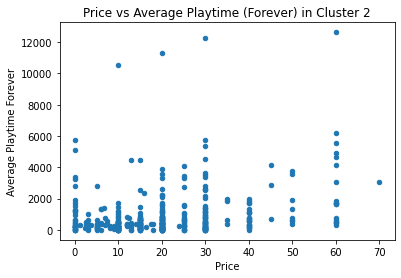

In [69]:
cluster_2_df.plot(
    kind="scatter",
    x="Price_original",
    y="Average playtime forever_original",
    title="Price vs Average Playtime (Forever) in Cluster 2",
)
plt.xlabel("Price")
plt.ylabel("Average Playtime Forever")
plt.show()

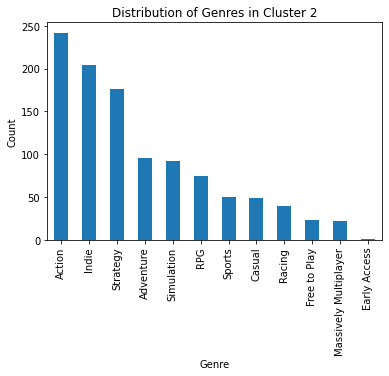

In [70]:
genres_series = (
    cluster_2_df["Genres"].str.split(",").explode()
)  # Split genres and count
genres_series.value_counts().plot(
    kind="bar", title="Distribution of Genres in Cluster 2"
)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

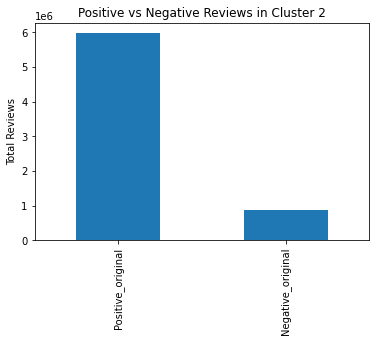

In [71]:
cluster_2_df[["Positive_original", "Negative_original"]].sum().plot(
    kind="bar", title="Positive vs Negative Reviews in Cluster 2"
)
plt.ylabel("Total Reviews")
plt.show()

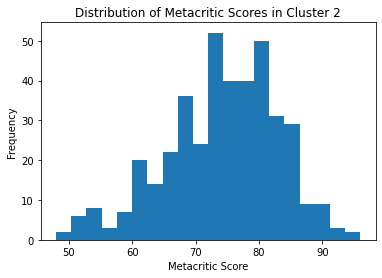

In [72]:
cluster_2_df["Metacritic score_original"].plot(
    kind="hist", bins=20, title="Distribution of Metacritic Scores in Cluster 2"
)
plt.xlabel("Metacritic Score")
plt.show()

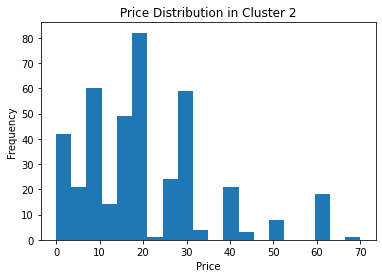

In [73]:
cluster_2_df["Price_original"].plot(
    kind="hist", bins=20, title="Price Distribution in Cluster 2"
)
plt.xlabel("Price")
plt.show()

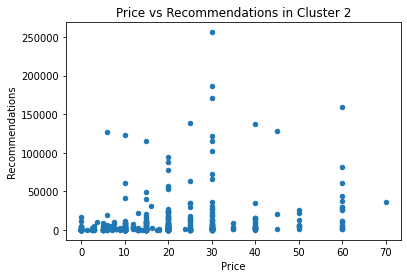

In [74]:
cluster_2_df.plot(
    kind="scatter",
    x="Price_original",
    y="Recommendations_original",
    title="Price vs Recommendations in Cluster 2",
)
plt.xlabel("Price")
plt.ylabel("Recommendations")
plt.show()

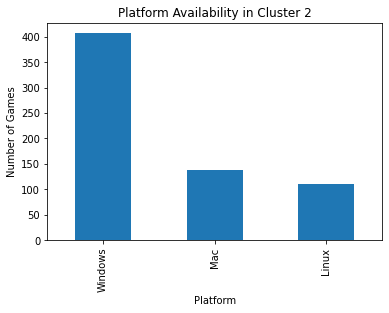

In [75]:
platform_columns = ["Windows", "Mac", "Linux"]
cluster_2_df[platform_columns].sum().plot(
    kind="bar", title="Platform Availability in Cluster 2"
)
plt.xlabel("Platform")
plt.ylabel("Number of Games")
plt.show()

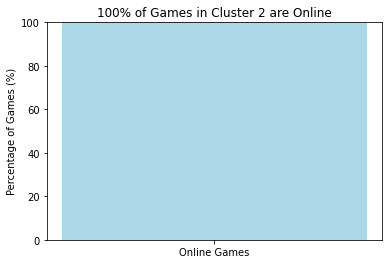

In [84]:
# Check if all games are online
online_percentage = (cluster_2_df["online_offline"].sum() / len(cluster_2_df)) * 100

# Create a single bar plot
plt.bar(["Online Games"], [online_percentage], color="lightblue")

# Set the plot title and labels
plt.title("100% of Games in Cluster 2 are Online")
plt.ylabel("Percentage of Games (%)")
plt.ylim(0, 100)  # Set y-axis from 0 to 100

plt.show()

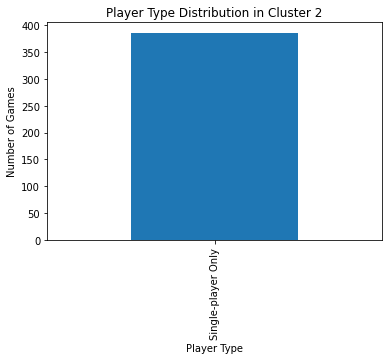

In [85]:
player_type_map = {
    1: "Single-player Only",
    2: "Multi-player Only",
    3: "Both Single-player and Multi-player",
}
cluster_2_df["player_type_numeric"].map(player_type_map).value_counts().plot(
    kind="bar", title="Player Type Distribution in Cluster 2"
)
plt.xlabel("Player Type")
plt.ylabel("Number of Games")
plt.show()

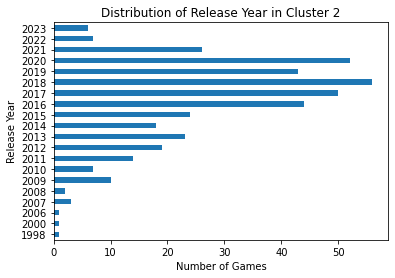

In [90]:
# Count the number of games per release year
release_year_counts = cluster_2_df["release_year_original"].value_counts().sort_index()

# Plot a horizontal bar chart
release_year_counts.plot(kind="barh", title="Distribution of Release Year in Cluster 2")

# Add labels
plt.xlabel("Number of Games")
plt.ylabel("Release Year")

# Show the plot
plt.show()

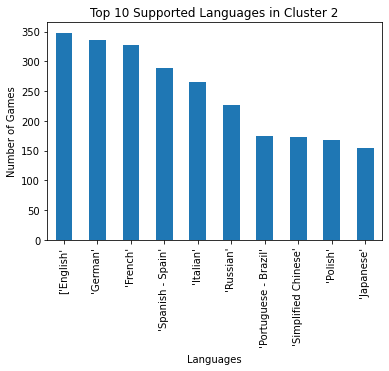

In [91]:
supported_languages_series = (
    cluster_2_df["Supported languages"].str.split(",").explode()
)
supported_languages_series.value_counts().head(10).plot(
    kind="bar", title="Top 10 Supported Languages in Cluster 2"
)
plt.xlabel("Languages")
plt.ylabel("Number of Games")
plt.show()

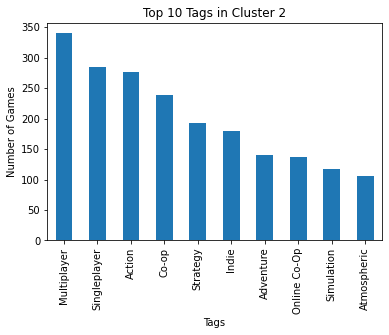

In [98]:
tags_series = cluster_2_df["Tags"].str.split(",").explode()  # Split and explode tags
tags_series.value_counts().head(10).plot(kind="bar", title="Top 10 Tags in Cluster 2")
plt.xlabel("Tags")
plt.ylabel("Number of Games")
plt.show()